# i. Perkenalan
Nama: Timothy
Batch: FTDS-011
Dataset: Uber vs Lyft
Objective: Memprediksi Harga Uber & Lyft dengan regresi linear

# ii. Import Libraries
Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [ ]:
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns

# iii. Data Loading
Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Dataset/rideshare_kaggle.csv')

# iv. Exploratory Data Analysis (EDA)
Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


Menghitung jumlah missing values dalam dataframe

In [ ]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

dapat terlihat di bagian kolom price terdapat 55095 baris yang kosong (null) ~8%

menghitung rata rata harga dalam setiap rute

In [ ]:
pd.set_option('display.max_rows', 72)
df.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.982630
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169406
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 

# v. Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [ ]:
taxi = df.copy()



Menghapus kolom kolom yang tidak digunakan

In [ ]:
taxi = taxi.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis=1)

In [ ]:
taxi.shape

(693071, 42)

Saya akan mengecek korelasi antara *temperature related column* terhadap kolom harga (*price*)

In [ ]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

df_temp = taxi[temp_cols]
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0


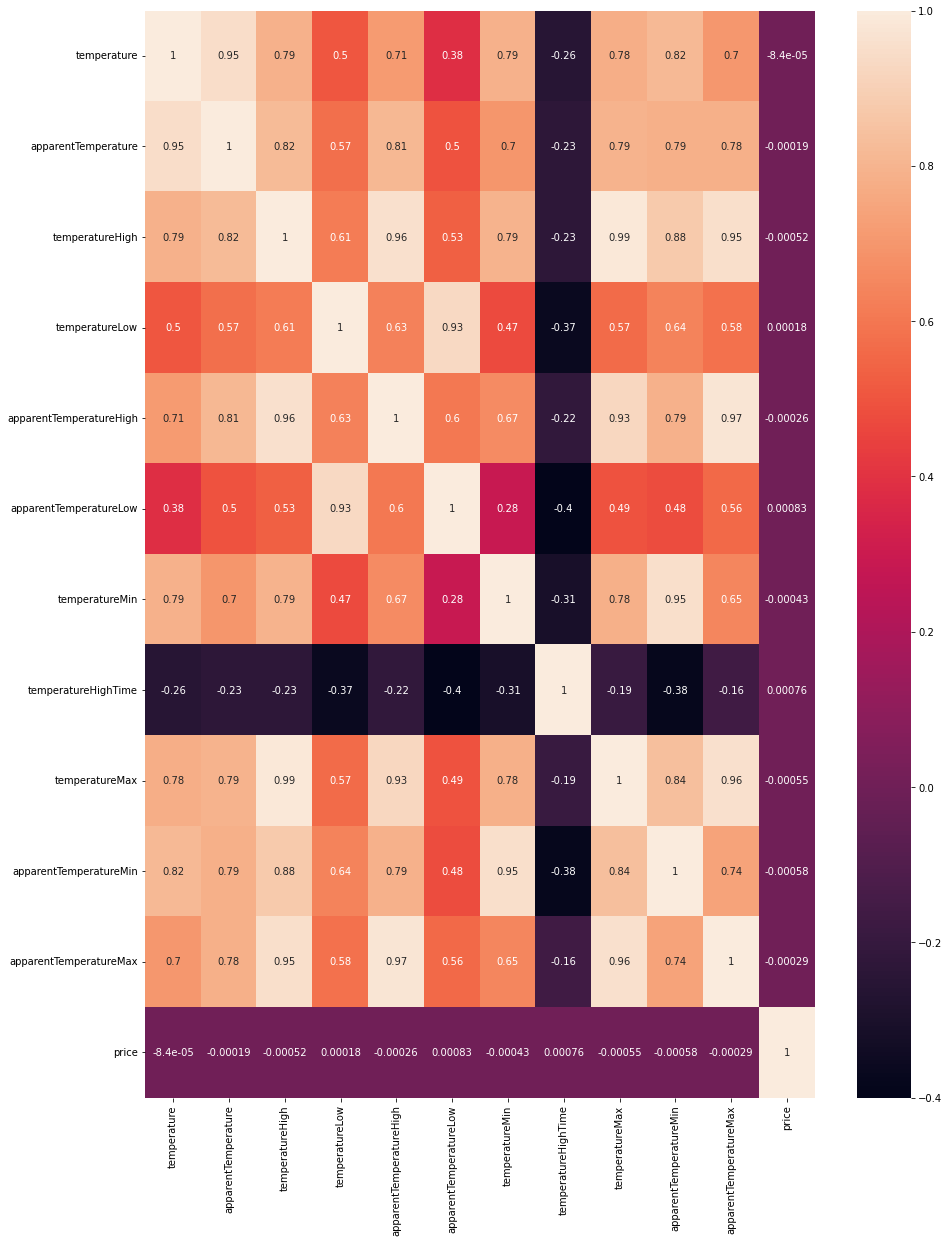

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df_temp.corr(),annot=True)

Karena korelasi kolom temperature terhadap kolom harga lemah maka saya akan menghilangkan kolom tersebut karena tidak akan berpengaruh pada model regresi yang akan saya buat

In [ ]:
taxi = taxi.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'],axis=1)
taxi.shape

(693071, 31)

Saya akan mengecek korelasi antara *climate related columns* terhadap kolom harga (price)

In [ ]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = taxi[climate_column]
df_clim.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


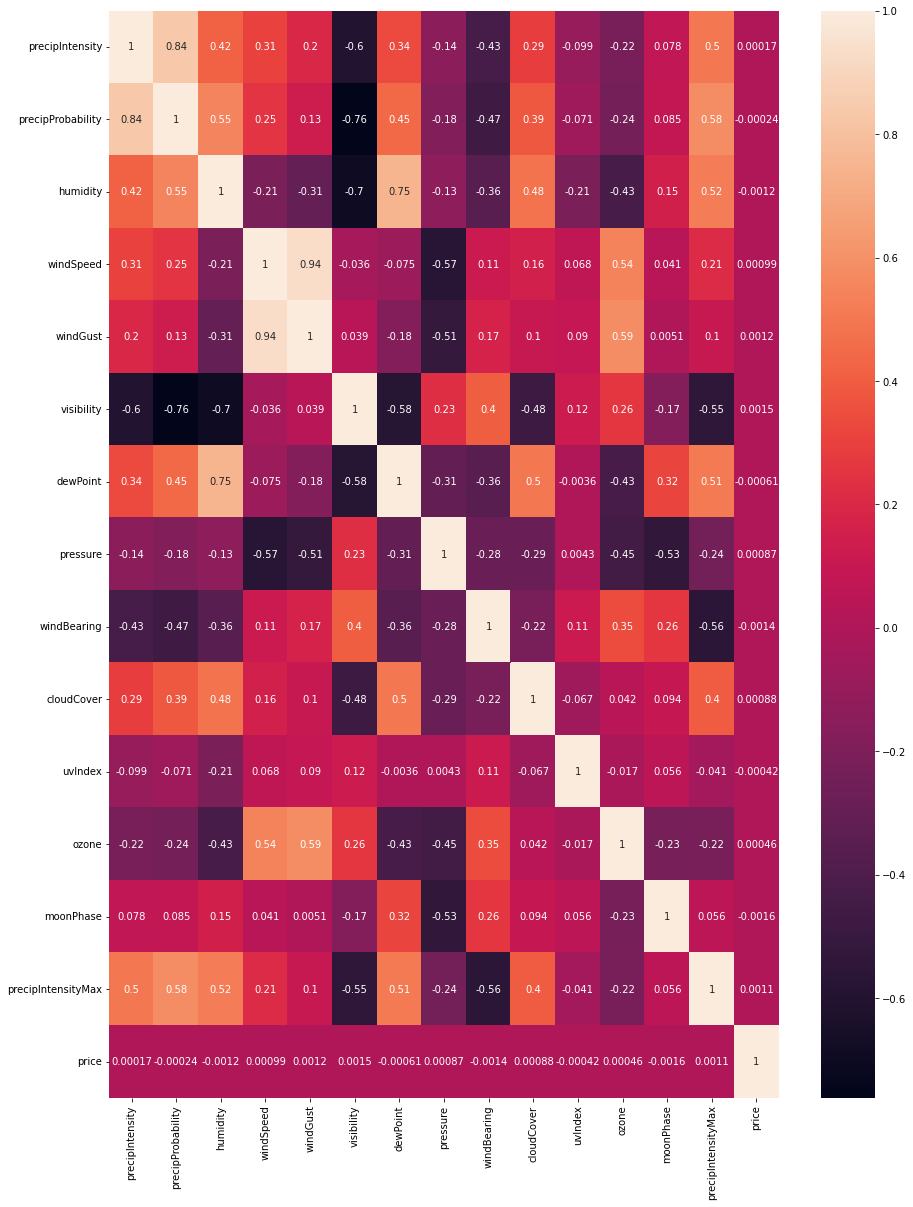

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df_clim.corr(),annot=True)

Karena korelasi kolom *climate* terhadap kolom harga lemah maka saya akan menghilangkan kolom tersebut karena tidak akan berpengaruh pada model regresi yang akan saya buat

In [ ]:
taxi = taxi.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
taxi.shape

(693071, 17)

Menghilangkan kolom jam, hari, bulan, lat dan lon karena berdasarkan opini pribadi saya untuk data timestamp saat ini tidak relevan dengan objective yang ingin dicapai

In [ ]:
taxi = taxi.drop(['hour','day','month','latitude','longitude'],axis=1)
taxi.head()

,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,icon,visibility.1
0,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night,10.000
1,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,Rain,rain,4.786
2,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,Clear,clear-night,10.000
3,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,Clear,clear-night,10.000
4,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night,10.000


In [ ]:
category_col = taxi.select_dtypes(include=['object','category']).columns.tolist()
for column in taxi[category_col]:
    print(f'{column} : {taxi[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']

short_summary : [' M

Menghilangkan kolom timezone dan product_id

In [ ]:
taxi = taxi.drop(['timezone','product_id'],axis=1)

In [ ]:
taxi.shape

(693071, 10)

In [ ]:
new_cat = ['source',
 'destination',
 'cab_type',
 'name',
 'short_summary',
 'icon','price']

df_cat = taxi[new_cat]
df_cat.head()

,source,destination,cab_type,name,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0


Mengecek korelasi antara kolom kategori terhadap kolom harga

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [ ]:
df_cat_encode

,source,destination,cab_type,name,short_summary,icon,price
0,5,7,0,7,4,5,5.0
1,5,7,0,2,8,6,11.0
2,5,7,0,5,0,1,7.0
3,5,7,0,4,0,1,26.0
4,5,7,0,6,6,5,9.0
...,...,...,...,...,...,...,...
693066,11,6,1,11,6,5,13.0
693067,11,6,1,10,6,5,9.5
693068,11,6,1,8,6,5,NaN
693069,11,6,1,1,6,5,27.0


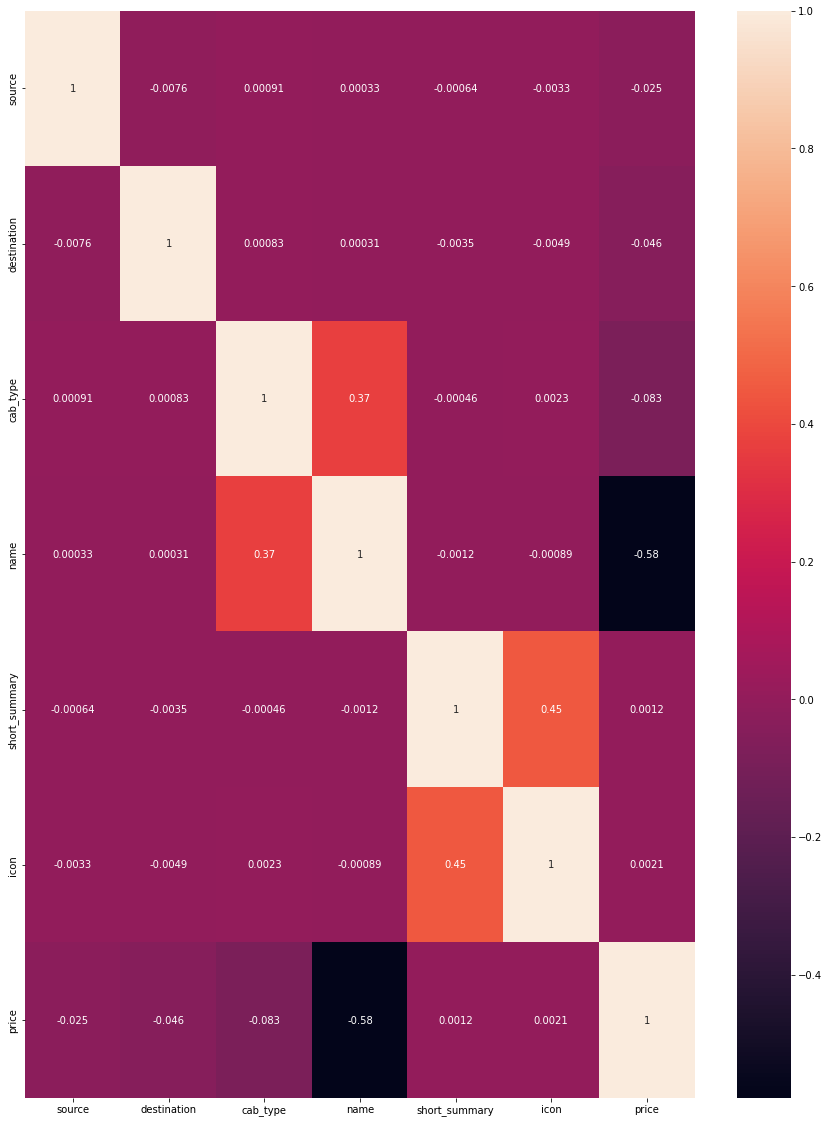

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df_cat_encode.corr(),annot=True)

Yang memiliki korelasi tinggi dengan kolom harga hanyalah kolom nama itupun korelasi negatif

In [ ]:
taxi = taxi.drop(['source','destination','short_summary','icon'],axis=1)
taxi.head()

,cab_type,name,price,distance,surge_multiplier,visibility.1
0,Lyft,Shared,5.0,0.44,1.0,10.000
1,Lyft,Lux,11.0,0.44,1.0,4.786
2,Lyft,Lyft,7.0,0.44,1.0,10.000
3,Lyft,Lux Black XL,26.0,0.44,1.0,10.000
4,Lyft,Lyft XL,9.0,0.44,1.0,10.000


## Get Data for Model Inherence

In [ ]:
data_inf = taxi.sample(10, random_state=17)
data_inf

,cab_type,name,price,distance,surge_multiplier,visibility.1
470612,Uber,Taxi,NaN,0.39,1.0,10.000
685801,Lyft,Lyft,9.0,2.20,1.0,9.815
427160,Uber,Black,16.5,1.16,1.0,9.948
499740,Uber,WAV,15.0,5.70,1.0,8.459
226985,Uber,Black,30.5,4.55,1.0,10.000
435550,Lyft,Lux Black XL,27.5,0.98,1.0,9.827
654282,Uber,UberX,9.5,1.92,1.0,2.686
493584,Lyft,Lux,10.5,1.02,1.0,7.790
88813,Uber,UberPool,10.0,2.98,1.0,4.315
360264,Uber,Black SUV,28.0,1.84,1.0,9.944


In [ ]:
data_train_test = taxi.drop(data_inf.index)
data_train_test

,cab_type,name,price,distance,surge_multiplier,visibility.1
0,Lyft,Shared,5.0,0.44,1.0,10.000
1,Lyft,Lux,11.0,0.44,1.0,4.786
2,Lyft,Lyft,7.0,0.44,1.0,10.000
3,Lyft,Lux Black XL,26.0,0.44,1.0,10.000
4,Lyft,Lyft XL,9.0,0.44,1.0,10.000
...,...,...,...,...,...,...
693066,Uber,UberXL,13.0,1.00,1.0,9.785
693067,Uber,UberX,9.5,1.00,1.0,9.785
693068,Uber,Taxi,NaN,1.00,1.0,9.785
693069,Uber,Black SUV,27.0,1.00,1.0,9.785


In [ ]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,cab_type,name,price,distance,surge_multiplier,visibility.1
0,Uber,Taxi,NaN,0.39,1.0,10.000
1,Lyft,Lyft,9.0,2.20,1.0,9.815
2,Uber,Black,16.5,1.16,1.0,9.948
3,Uber,WAV,15.0,5.70,1.0,8.459
4,Uber,Black,30.5,4.55,1.0,10.000
5,Lyft,Lux Black XL,27.5,0.98,1.0,9.827
6,Uber,UberX,9.5,1.92,1.0,2.686
7,Lyft,Lux,10.5,1.02,1.0,7.790
8,Uber,UberPool,10.0,2.98,1.0,4.315
9,Uber,Black SUV,28.0,1.84,1.0,9.944


## Splitting Dataset

In [ ]:
X = data_train_test.drop('price', axis=1)
y = data_train_test['price']
X

,cab_type,name,distance,surge_multiplier,visibility.1
0,Lyft,Shared,0.44,1.0,10.000
1,Lyft,Lux,0.44,1.0,4.786
2,Lyft,Lyft,0.44,1.0,10.000
3,Lyft,Lux Black XL,0.44,1.0,10.000
4,Lyft,Lyft XL,0.44,1.0,10.000
...,...,...,...,...,...
693056,Uber,UberXL,1.00,1.0,9.785
693057,Uber,UberX,1.00,1.0,9.785
693058,Uber,Taxi,1.00,1.0,9.785
693059,Uber,Black SUV,1.00,1.0,9.785


In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (554448, 5)
Test Size  :  (138613, 5)


In [ ]:
X_train.isnull().sum()

cab_type            0
name                0
distance            0
surge_multiplier    0
visibility.1        0
dtype: int64

In [ ]:
y_train.isnull().sum()

43922

In [ ]:
X_test.isnull().sum()

cab_type            0
name                0
distance            0
surge_multiplier    0
visibility.1        0
dtype: int64

In [ ]:
y_test.isnull().sum()

11172

## Handling Outlier


## Distribution Check

In [ ]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

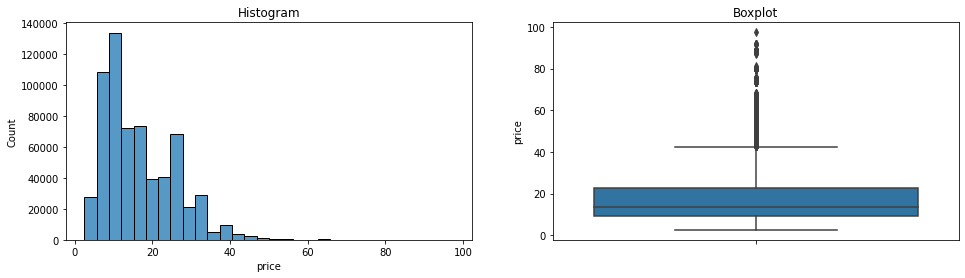


Skewness Value :  1.0457470560899256


In [ ]:
diagnostic_plots(taxi, 'price')
print('\nSkewness Value : ', taxi['price'].skew())

Kolom data tersebut tidak terdistribusi secara normal

Mencari boundary untuk variable yang terdistribusi skewed

In [ ]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
upper_boundary, lower_boundary = find_skewed_boundaries(taxi, 'price', 1.5)
upper_boundary, lower_boundary

(42.75, -11.25)

In [ ]:
print('Total price : {}'.format(len(taxi)))
print('Sum with Price bigger than 43   : {}'.format(len(taxi[taxi['price'] > upper_boundary])))
print('')
print('% sum with Price bigger than 43 : {}'.format(len(taxi[taxi['price'] > upper_boundary])/len(taxi) * 100))

Total price : 693071
Sum with Price bigger than 43   : 5589

% sum with Price bigger than 43 : 0.8064108871962614


Karena persentasi dibawah 5%, saya akan menggunakan metode trimming

In [ ]:
price_upper_limit, price_lower_limit = find_skewed_boundaries(taxi, 'price', 1.5)
price_upper_limit, price_lower_limit
print('price_upper_limit : ', price_upper_limit)
print('price_lower_limit : ', price_lower_limit, '\n')

price_upper_limit :  42.75
price_lower_limit :  -11.25 



In [ ]:
  outliers_price = np.where(taxi['price'] > price_upper_limit, True,
                        np.where(taxi['price'] < price_lower_limit, True, False))
  print(outliers_price[:10])

[False False False False False False False False False False]


In [ ]:
taxi_trimmed = taxi.loc[~(outliers_price)]
print('Size dataset - Before trimming : ', taxi.shape)
print('Size dataset - After trimming  : ', taxi_trimmed.shape)

Size dataset - Before trimming :  (693071, 6)
Size dataset - After trimming  :  (687482, 6)


price - Before Trimming


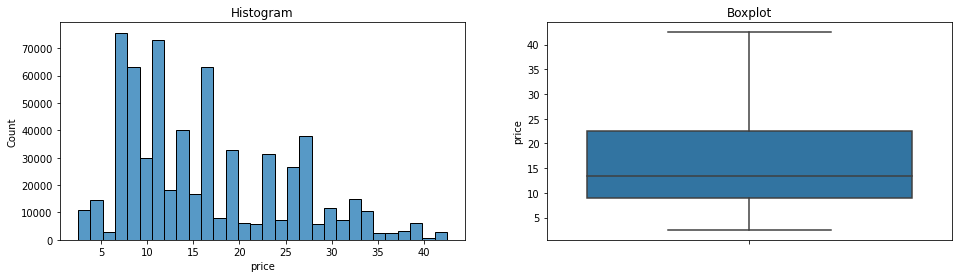


price - After Trimming


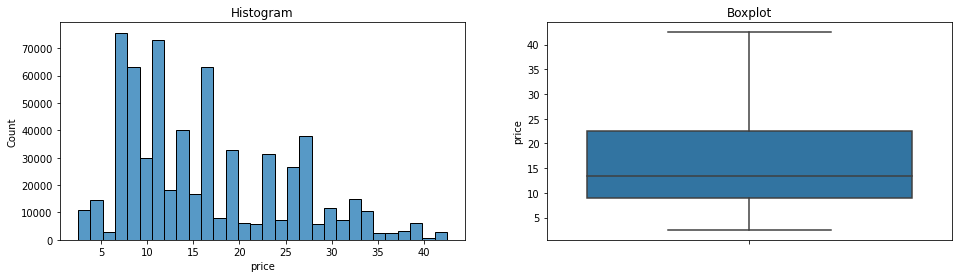

In [ ]:
print('price - Before Trimming')
diagnostic_plots(taxi_trimmed, 'price')
print('\nprice - After Trimming')
diagnostic_plots(taxi_trimmed, 'price')

## Handling Missing Values
Karena terdapat value di kolom y_train dan y_test yang kosong, maka saya akan melakukan cek MCAR/MAR/MNAR

In [ ]:
taxi['price_null'] = np.where(taxi.price.isnull(), 1, 0)
taxi

,cab_type,name,price,distance,surge_multiplier,visibility.1,price_null
0,Lyft,Shared,5.0,0.44,1.0,10.000,0
1,Lyft,Lux,11.0,0.44,1.0,4.786,0
2,Lyft,Lyft,7.0,0.44,1.0,10.000,0
3,Lyft,Lux Black XL,26.0,0.44,1.0,10.000,0
4,Lyft,Lyft XL,9.0,0.44,1.0,10.000,0
...,...,...,...,...,...,...,...
693066,Uber,UberXL,13.0,1.00,1.0,9.785,0
693067,Uber,UberX,9.5,1.00,1.0,9.785,0
693068,Uber,Taxi,NaN,1.00,1.0,9.785,1
693069,Uber,Black SUV,27.0,1.00,1.0,9.785,0


In [ ]:
print('Value Counts')
print(taxi.groupby(['cab_type'])['price_null'].value_counts())

print('\nMean')
print(taxi.groupby(['cab_type'])['price_null'].mean())

Value Counts
cab_type  price_null
Lyft      0             307408
Uber      0             330568
          1              55095
Name: price_null, dtype: int64

Mean
cab_type
Lyft    0.000000
Uber    0.142858
Name: price_null, dtype: float64


Kebanyakan missing values adalah data pengguna Uber jadi saya asumsikan hal ini adalah Missing Not At Random (MNAR)

In [ ]:
data_taxi = taxi.copy()
X_train_taxi, X_test_taxi, y_train_taxi, y_test_taxi = train_test_split(data_taxi, 
                                                                                    data_taxi.price, 
                                                                                    test_size=0.3, 
                                                                                    random_state=0)
X_train_taxi.shape, X_test_taxi.shape

((485149, 7), (207922, 7))

Skewness :  1.0376173719760633


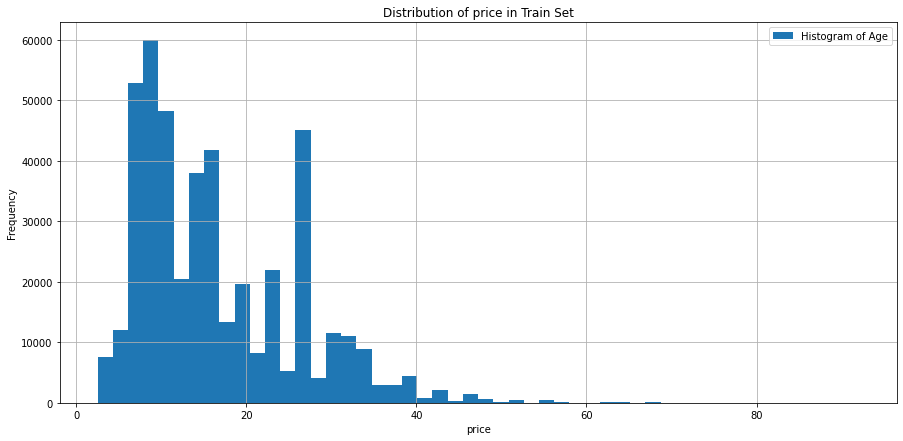

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

X_train_taxi.price.hist(bins=50, ax=ax, label='Histogram of Age') # Histogram of original dataset
ax.set_title('Distribution of price in Train Set')
ax.set_xlabel('price')
ax.set_ylabel('Frequency')
ax.legend(loc="upper right")

print('Skewness : ', X_train_taxi.price.skew())

In [ ]:
mean_taxi_price = X_train_taxi.price.mean()
median_taxi_price = X_train_taxi.price.median()

print('Mean Value - Train Set - Before Imputation   : ', mean_taxi_price)
print('Median Value - Train Set - Before Imputation : ', median_taxi_price)

Mean Value - Train Set - Before Imputation   :  16.55481824757204
Median Value - Train Set - Before Imputation :  13.5


In [ ]:
def impute_na(df, variable, mean_value, median_value):
  df[variable+'_mean'] = df[variable].fillna(mean_value)
  df[variable+'_median'] = df[variable].fillna(median_value)
  df[variable+'_zero'] = df[variable].fillna(0)
  
  return df

In [ ]:
X_train_taxi = impute_na(X_train_taxi, 'price', mean_taxi_price, median_taxi_price)
X_test_taxi = impute_na(X_test_taxi, 'price', mean_taxi_price, median_taxi_price)
X_train_taxi

,cab_type,name,price,distance,surge_multiplier,visibility.1,price_null,price_mean,price_median,price_zero
653814,Lyft,Lux Black,16.5,0.57,1.0,6.639,0,16.5,16.5,16.5
591472,Uber,Black,27.5,3.07,1.0,8.540,0,27.5,27.5,27.5
243732,Lyft,Lux Black,16.5,0.64,1.0,9.670,0,16.5,16.5,16.5
343197,Lyft,Shared,7.0,1.69,1.0,3.139,0,7.0,7.0,7.0
234213,Uber,UberXL,17.0,2.46,1.0,9.770,0,17.0,17.0,17.0
...,...,...,...,...,...,...,...,...,...,...
359783,Uber,UberXL,18.0,3.45,1.0,10.000,0,18.0,18.0,18.0
152315,Lyft,Lux Black,26.0,2.87,1.0,9.937,0,26.0,26.0,26.0
117952,Uber,UberXL,18.5,3.08,1.0,10.000,0,18.5,18.5,18.5
435829,Lyft,Lyft XL,16.5,3.17,1.0,10.000,0,16.5,16.5,16.5


## Split between Numerical Columns and Categorical Columns


In [ ]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['distance', 'surge_multiplier', 'visibility.1']
Categorical Columns :  ['cab_type', 'name']


In [ ]:
X_train_num = X_train_taxi[num_columns]
X_train_cat = X_train_taxi[cat_columns]

X_test_num = X_test_taxi[num_columns]
X_test_cat = X_test_taxi[cat_columns]

## Feature Scaling
Karena data skew maka saya akan menggunakan MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.07015306, 0.        , 0.63794032],
       [0.38903061, 0.        , 0.84272326],
       [0.07908163, 0.        , 0.96445115],
       ...,
       [0.39030612, 0.        , 1.        ],
       [0.40178571, 0.        , 1.        ],
       [0.3380102 , 0.        , 0.48669611]])

## Feature Encoding

In [ ]:
X_train_num

,distance,surge_multiplier,visibility.1
653814,0.57,1.0,6.639
591472,3.07,1.0,8.540
243732,0.64,1.0,9.670
343197,1.69,1.0,3.139
234213,2.46,1.0,9.770
...,...,...,...
359783,3.45,1.0,10.000
152315,2.87,1.0,9.937
117952,3.08,1.0,10.000
435829,3.17,1.0,10.000


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='ignore')
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

array([[ 0.,  3.],
       [ 1.,  0.],
       [ 0.,  3.],
       ...,
       [ 1., 11.],
       [ 0.,  6.],
       [ 1., 10.]])

In [ ]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train_final

array([[ 0.07015306,  0.        ,  0.63794032,  0.        ,  3.        ],
       [ 0.38903061,  0.        ,  0.84272326,  1.        ,  0.        ],
       [ 0.07908163,  0.        ,  0.96445115,  0.        ,  3.        ],
       ...,
       [ 0.39030612,  0.        ,  1.        ,  1.        , 11.        ],
       [ 0.40178571,  0.        ,  1.        ,  0.        ,  6.        ],
       [ 0.3380102 ,  0.        ,  0.48669611,  1.        , 10.        ]])

# vi. Model Definition
Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [ ]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()

# vii. Model Training
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [ ]:
y_train_taxi.fillna(median_taxi_price, inplace=True)


In [ ]:
y_test_taxi.fillna(median_taxi_price, inplace=True)

In [ ]:
model.fit(X_train_final,y_train_taxi)

LinearRegression()

# viii. Model Evaluation
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [ ]:
y_pred_train = model.predict(X_train_final)
y_pred_test = model.predict(X_test_final)

y_pred_train

array([14.82469426, 28.5293475 , 14.99695195, ..., 12.21825566,
       16.99549123, 12.66716177])

In [ ]:
from sklearn.metrics import mean_absolute_error

print('Error Train-Set : ', mean_absolute_error(y_train_taxi, y_pred_train))
print('Error Test-Set  : ', mean_absolute_error(y_test_taxi, y_pred_test))

Error Train-Set :  4.9278623155148304
Error Test-Set  :  4.916902975106581


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train_taxi, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test_taxi, y_pred_test))

print('MSE train = ', mean_squared_error(y_train_taxi, y_pred_train))
print('MSE test = ', mean_squared_error(y_test_taxi, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train_taxi, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test_taxi, y_pred_test)))

print('r2score train = ', r2_score(y_train_taxi, y_pred_train))
print('r2score test = ', r2_score(y_test_taxi, y_pred_test))

MAE train =  4.9278623155148304
MAE test =  4.916902975106581
MSE train =  39.885607117025636
MSE test =  39.78442143110541
RMSE train =  6.315505293879947
RMSE test =  6.307489312801521
r2score train =  0.505320476989344
r2score test =  0.5082263155710443


# xi. Model Inference
Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.



In [ ]:
data_inf

,cab_type,name,price,distance,surge_multiplier,visibility.1
0,Uber,Taxi,NaN,0.39,1.0,10.000
1,Lyft,Lyft,9.0,2.20,1.0,9.815
2,Uber,Black,16.5,1.16,1.0,9.948
3,Uber,WAV,15.0,5.70,1.0,8.459
4,Uber,Black,30.5,4.55,1.0,10.000
5,Lyft,Lux Black XL,27.5,0.98,1.0,9.827
6,Uber,UberX,9.5,1.92,1.0,2.686
7,Lyft,Lux,10.5,1.02,1.0,7.790
8,Uber,UberPool,10.0,2.98,1.0,4.315
9,Uber,Black SUV,28.0,1.84,1.0,9.944


In [ ]:
data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

data_inf_num

,distance,surge_multiplier,visibility.1
0,0.39,1.0,10.000
1,2.20,1.0,9.815
2,1.16,1.0,9.948
3,5.70,1.0,8.459
4,4.55,1.0,10.000
5,0.98,1.0,9.827
6,1.92,1.0,2.686
7,1.02,1.0,7.790
8,2.98,1.0,4.315
9,1.84,1.0,9.944


In [ ]:
data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_encoded = encoder.transform(data_inf_cat)
data_inf_num_scaled

array([[0.04719388, 0.        , 1.        ],
       [0.27806122, 0.        , 0.9800711 ],
       [0.14540816, 0.        , 0.99439836],
       [0.7244898 , 0.        , 0.83399763],
       [0.57780612, 0.        , 1.        ],
       [0.12244898, 0.        , 0.98136378],
       [0.24234694, 0.        , 0.21210815],
       [0.12755102, 0.        , 0.76193041],
       [0.37755102, 0.        , 0.38759022],
       [0.23214286, 0.        , 0.99396747]])

In [ ]:
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)
data_inf_final

array([[ 0.04719388,  0.        ,  1.        ,  1.        ,  8.        ],
       [ 0.27806122,  0.        ,  0.9800711 ,  0.        ,  5.        ],
       [ 0.14540816,  0.        ,  0.99439836,  1.        ,  0.        ],
       [ 0.7244898 ,  0.        ,  0.83399763,  1.        , 12.        ],
       [ 0.57780612,  0.        ,  1.        ,  1.        ,  0.        ],
       [ 0.12244898,  0.        ,  0.98136378,  0.        ,  4.        ],
       [ 0.24234694,  0.        ,  0.21210815,  1.        , 10.        ],
       [ 0.12755102,  0.        ,  0.76193041,  0.        ,  2.        ],
       [ 0.37755102,  0.        ,  0.38759022,  1.        ,  9.        ],
       [ 0.23214286,  0.        ,  0.99396747,  1.        ,  1.        ]])

In [ ]:
y_pred_inf = model.predict(data_inf_final)
y_pred_inf

array([ 9.81088211, 16.00635067, 23.65415566, 17.42000988, 32.30167492,
       14.37906956, 10.7592738 , 17.45508379, 14.94473146, 23.90392195])

In [ ]:
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Price - Prediction'])
y_pred_inf_df

,Price - Prediction
0,9.810882
1,16.006351
2,23.654156
3,17.420010
4,32.301675
5,14.379070
6,10.759274
7,17.455084
8,14.944731
9,23.903922


In [ ]:
pd.concat([data_inf, y_pred_inf_df], axis=1)

,cab_type,name,price,distance,surge_multiplier,visibility.1,Price - Prediction
0,Uber,Taxi,NaN,0.39,1.0,10.000,9.810882
1,Lyft,Lyft,9.0,2.20,1.0,9.815,16.006351
2,Uber,Black,16.5,1.16,1.0,9.948,23.654156
3,Uber,WAV,15.0,5.70,1.0,8.459,17.420010
4,Uber,Black,30.5,4.55,1.0,10.000,32.301675
5,Lyft,Lux Black XL,27.5,0.98,1.0,9.827,14.379070
6,Uber,UberX,9.5,1.92,1.0,2.686,10.759274
7,Lyft,Lux,10.5,1.02,1.0,7.790,17.455084
8,Uber,UberPool,10.0,2.98,1.0,4.315,14.944731
9,Uber,Black SUV,28.0,1.84,1.0,9.944,23.903922


# x. Pengambilan Keputusan
Berdasarkan model regresi linear, dapat saya simpulkan untuk model prediksi harga taxi yang telah saya buat tidak disarankan untuk digunakan terhadap dataset lainnya karena tingkat akurasi ~50% dan RMSE score yang cukup tinggi, hal ini disebabkan oleh kurangnya wawasan saya dalam machine learning baik dalam koding maupun teori

In [ ]:
intercept = model.intercept_
slope = model.coef_

print('Intercept : ', intercept)
print('Slope : ', slope)

Intercept :  17.88861743427768
Slope :  [ 1.99992328e+01  4.09311289e+01 -1.93160095e-02  2.87669433e+00
 -1.48486937e+00]
